In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem

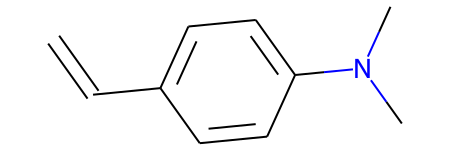

In [30]:
substrates = ['C=Cc1ccc(N(C)C)cc1', 'C1=C(Cl)CC(Cl)=C1Cl']
product = 'C1=C(Cl)C2(Cl)CC(c3ccc(N(C)C)cc3)C1(Cl)C2'

substrates = [Chem.MolFromSmiles(mol) for mol in substrates]
substrates[0]

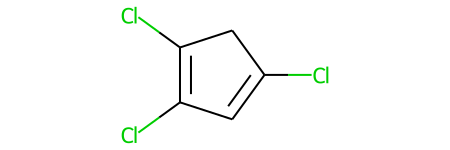

In [31]:
substrates[1]

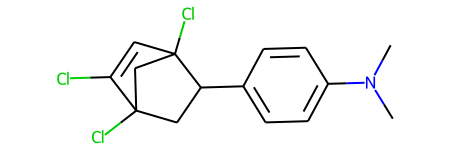

In [67]:
# substrates = [substrates[1], substrates[0]]
da_rxn_smarts = AllChem.ReactionFromSmarts(
    '[#6:1]=[#6:2].[#6:3]=[#6:4][#6:5]=[#6:6]>>[#6:1]1[#6:2][#6:3][#6:4]=[#6:5][#6:6]1'
)

def simulate_da_reaction(substrates):
    products = []
    products += da_rxn_smarts.RunReactants(substrates)
    substrates = [substrates[1], substrates[0]]
    products += da_rxn_smarts.RunReactants(substrates)
    
    products = [Chem.MolToSmiles(product[0]) for product in products]
    products = list(set(products))
    return [Chem.MolFromSmiles(product) for product in products]


simulate_da_reaction(substrates)[0]

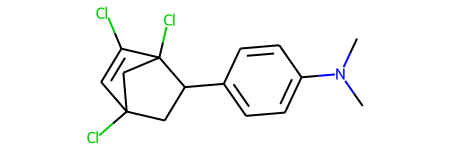

In [68]:
simulate_da_reaction(substrates)[1]

IndexError: list index out of range

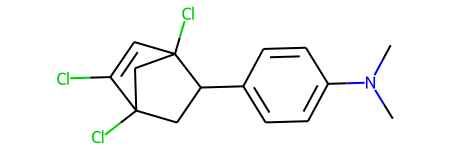

In [65]:
result[3][0]

In [96]:
import pandas as pd
import os

with open('/home/ruard/Downloads/MULTI_rxids.csv', 'r') as f:
    lines = f.readlines()
string = ';'.join(lines[1:]).replace('\n', '')

with open('/home/ruard/Downloads/da_multi_rxnids.txt', 'w') as f:
    f.writelines(results)
    
    
# print(len(results))
# results

In [79]:
path = '/home/ruard/Documents/datasets/DA_reaxys_export/'
dfs = []
for name in ['DA_1.tsv', 'DA_2.tsv', 'DA_3.tsv', 'DA_4.tsv']:
    dfs.append(pd.read_csv(os.path.join(path, name), sep='\t'))
    
df = pd.concat(dfs)
print(len(df))

29261


In [88]:
new_df = df[df['Reaction ID'].isin([int(res) for res in results])]
len(new_df)
new_df
# df[df['Reaction ID'] == '152569']

,Reaction ID,Reaction: Links to Reaxys,Data Count,Number of Reaction Details,Reaction Rank,Record Type,Reactant,Product,Bin,Reaction,...,Yield,Yield (numerical),Yield (optical),Stage Reactant,Reagent,Catalyst,Solvent (Reaction Details),References,Links to Reaxys,Unnamed: 41
749,28160927,https://www.reaxys.com/reaxys/secured/hopinto....,(180 of 5000),2,93,full reaction; has preparation,"2-methylbut-2-enal; ethyl (E)-3,5-hexadienoate","ethyl rac-2-((1R,5R,6S)-6-formyl-5,6-dimethylc...",222332,C\C=C(/C)C=O.CCOC(=O)C\C=C\C=C>>CCOC(=O)C[C@H]...,...,76 percent,76,NaN,NaN,boron trifluoride diethyl etherate,NaN,dichloromethane,Patent; COUNCIL OF SCIENTIFIC AND INDUSTRIAL R...,https://www.reaxys.com/reaxys/secured/hopinto....,NaN
750,28160927,https://www.reaxys.com/reaxys/secured/hopinto....,(180 of 5000),2,93,full reaction; has preparation,"2-methylbut-2-enal; ethyl (E)-3,5-hexadienoate","ethyl rac-2-((1R,5R,6S)-6-formyl-5,6-dimethylc...",222332,C\C=C(/C)C=O.CCOC(=O)C\C=C\C=C>>CCOC(=O)C[C@H]...,...,75 percent,75,NaN,NaN,boron trifluoride diethyl etherate,NaN,dichloromethane,Article; Srinivas; Srinivasa Reddy; Shiva Kuma...,https://www.reaxys.com/reaxys/secured/hopinto....,NaN
988,32519898,https://www.reaxys.com/reaxys/secured/hopinto....,(261 of 5000),1,92,full reaction; has preparation,"1-(phenoxycarbonyl)-1,2-dihydropyridine; (S)-3...",C25H24N2O5,2961,O=C(OC1=CC=CC=C1)N1CC=CC=C1.C=CC(=O)N1[C@@H](C...,...,99 percent,99,NaN,(S)-3-acryloyl-4-benzyloxazolidin-2-one; 1-(ph...,titanium(IV) dichlorodiisopropylate; (4R-trans...,NaN,toluene; toluene,"Article; Seki, Chigusa; Hirama, Masafumi; Huta...",https://www.reaxys.com/reaxys/secured/hopinto....,NaN
1076,644027,https://www.reaxys.com/reaxys/secured/hopinto....,(270 of 5000),25,91,full reaction; has preparation,methyl vinyl ketone; isoprene,(+-)-4-acetyl-1-methylcyclohexene,221495,CC(=O)C=C.CC(=C)C=C>>CC(=O)C1CCC(C)=CC1,...,97 percent,97,NaN,NaN,C36H47AlClN2O(1+)*C24H12BCl8(1-),NaN,dichloromethane,"Article; Liu, Zhizhou; Ganguly, Rakesh; Vidovi...",https://www.reaxys.com/reaxys/secured/hopinto....,NaN
1077,644027,https://www.reaxys.com/reaxys/secured/hopinto....,(270 of 5000),25,91,full reaction; has preparation,methyl vinyl ketone; isoprene,(+-)-4-acetyl-1-methylcyclohexene,221495,CC(=O)C=C.CC(=C)C=C>>CC(=O)C1CCC(C)=CC1,...,93 percent,93,NaN,NaN,tris(pentafluoroethyl)difluorophosphorane,NaN,dichloromethane,"Article; Bittner, Bozena; Koppe, Karsten; Bili...",https://www.reaxys.com/reaxys/secured/hopinto....,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3944,25967109,https://www.reaxys.com/reaxys/secured/hopinto....,(3553 of 4748),1,59,full reaction; has preparation,"(R)-benzyl 4-(3-acryloyloxy-4,4-dimethyl-2-oxo...","(3'R,1R4S)-1-[4-(benzyloxycarbonyl)phenyl]-4,4...",205540,CC1(C)CN(C(=O)[C@@H]1OC(=O)C=C)C1=CC=C(C=C1)C(...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Article; Songis, Olivier; Geant, Pierre Yves; ...",https://www.reaxys.com/reaxys/secured/hopinto....,NaN
4068,8550058,https://www.reaxys.com/reaxys/secured/hopinto....,(3661 of 4748),1,58,full reaction,"1-methoxybuta-1,3-diene; 3-(benzyloxycarbonyl)...","(4aRS,8RS,8aRS)-8a-(benzyloxycarbonyl)-8-metho...",220841; 220841,COC=CC=C.CC1=CC=C(C=C1)S(=O)(=O)N1CCC=C(C(=O)O...,...,NaN,NaN,NaN,NaN,zinc dibromide,NaN,dichloromethane,"Article; Casamitjana, Núria; López, Virginia; ...",https://www.reaxys.com/reaxys/secured/hopinto....,NaN
4244,28450495,https://www.reaxys.com/reaxys/secured/hopinto....,(3825 of 4748),1,58,full reaction; has preparation,"trimethyl 2-phosphonoacrylate; (4R,1'E)-3-(but...","C19H24NO6PS; (1R,2R)-1-(Dimethoxy-phosphoryl)-...",222724; 222724,COC(=O)C(=C)P(=O)(OC)OC.C=C\C=C\N1[C@@H](COC1=...,...,NaN,NaN,NaN,NaN,NaN,NaN,acetonitrile,"Article; Monbaliu, Jean-Christophe; Robiette, ...",https://www.reaxys.com/reaxys/secured/hopinto....,NaN
4270,29726650,https://www.reaxys.com/reaxys/secured/hopinto....,(3850 of 4748),1,58,full reaction; has preparation,2-bromo-acrylic acid ethyl este